In [49]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [50]:
fs = 1000
N = 200
k = np.arange(200)
frq = k*fs/N
frq1 = frq[range(int(N/2))]

In [51]:
# 读取数据
import pandas as pd
data = pd.read_excel('../Resource/ExperimentDataBase/CV1(1).xlsx')

In [52]:
data.head()

,SAVI,EVI,TCART,CIrededge１,DVI,OSAVI,RDVI,TVI,MNVI,MSAVI,MTVI,CV
0,0.394629,0.383929,0.209295,0.247484,0.200040,0.475878,0.392039,13.330532,5.008147,0.000510,0.074236,0.5827
1,0.200114,0.179832,0.084067,0.114146,0.080682,0.304724,0.249262,5.372898,5.737333,-0.278963,0.032676,0.3358
2,0.318954,0.300633,0.153540,0.210359,0.146928,0.418618,0.336207,9.791171,5.371085,-0.114998,0.056766,0.6749
3,0.439483,0.435977,0.249560,0.346168,0.237352,0.504890,0.426224,15.819550,4.723679,0.069591,0.085574,0.6258
4,0.442455,0.439432,0.251764,0.348997,0.239668,0.507217,0.428720,15.980725,4.710130,0.074714,0.086328,0.7649


In [69]:
import pandas as pd
import numpy as np
import pyperclip

# # 将从Excel中复制的数据粘贴到剪贴板中
# data_from_excel = pyperclip.paste()
#
# # 将数据转换为一维数组
# data_array = np.array(pd.read_clipboard(header=None, sep=',', dtype=str).iloc[:, 0])
#
# # 打印数组
# print(data_array)
data_array = np.array(data.iloc[:,0:4])
# 转置数组并将其转换为嵌套列表
data_list = data_array.transpose().tolist()
#print(data_list)


In [63]:
import numpy as np
import pandas as pd

# 将数据转为二维数组
data_array = np.array(data)

# 对二维数组进行转置
transposed_array = data_array.transpose()

# 输出转置后的数组
print(transposed_array)


[[ 3.94628956e-01  2.00114018e-01  3.18954007e-01  4.39483165e-01
   4.42455080e-01  3.17991151e-01  3.85840887e-01  5.89760356e-01
   3.61800025e-01  4.11145696e-01  3.56711895e-01  3.51493264e-01
   3.55268286e-01  3.49978461e-01  5.61062715e-01  2.90334814e-01
   1.98698860e-01  2.66840774e-01  3.38377493e-01  3.03402159e-01
   2.85105593e-01  2.09575407e-01  5.30588062e-01  3.96216631e-01
   5.20622770e-01  3.63670731e-01  4.50556476e-01  2.73117300e-01
   5.08743696e-01  4.24432852e-01  3.75218091e-01  5.44784145e-01
   5.22908001e-01  4.22666973e-01  3.53270191e-01  2.48346537e-01
   4.93225578e-01  3.59494667e-01  4.08624823e-01  5.21493722e-01
   3.58298460e-01  2.79883004e-01  3.85697755e-01  2.41268440e-02
   3.53941290e-01  3.84625326e-01  3.64482812e-01  3.07113120e-01
   4.11060729e-01  4.68688333e-01  3.05306486e-01  4.63837961e-01
   3.00556411e-01  2.80412332e-01  3.71257128e-01  2.89588997e-01
   3.24255720e-01  2.25293411e-01  3.79029842e-01  2.90752354e-01
   3.29476

In [70]:
aa = []
for i in range(200):
    aa.append(np.sin(0.3*np.pi*i))
for i in range(200):
    aa.append(np.sin(0.13*np.pi*i))
for i in range(200):
    aa.append(np.sin(0.05*np.pi*i))
y = aa
# print(y)

In [ ]:
import pandas as pd
import pywt
import openpyxl

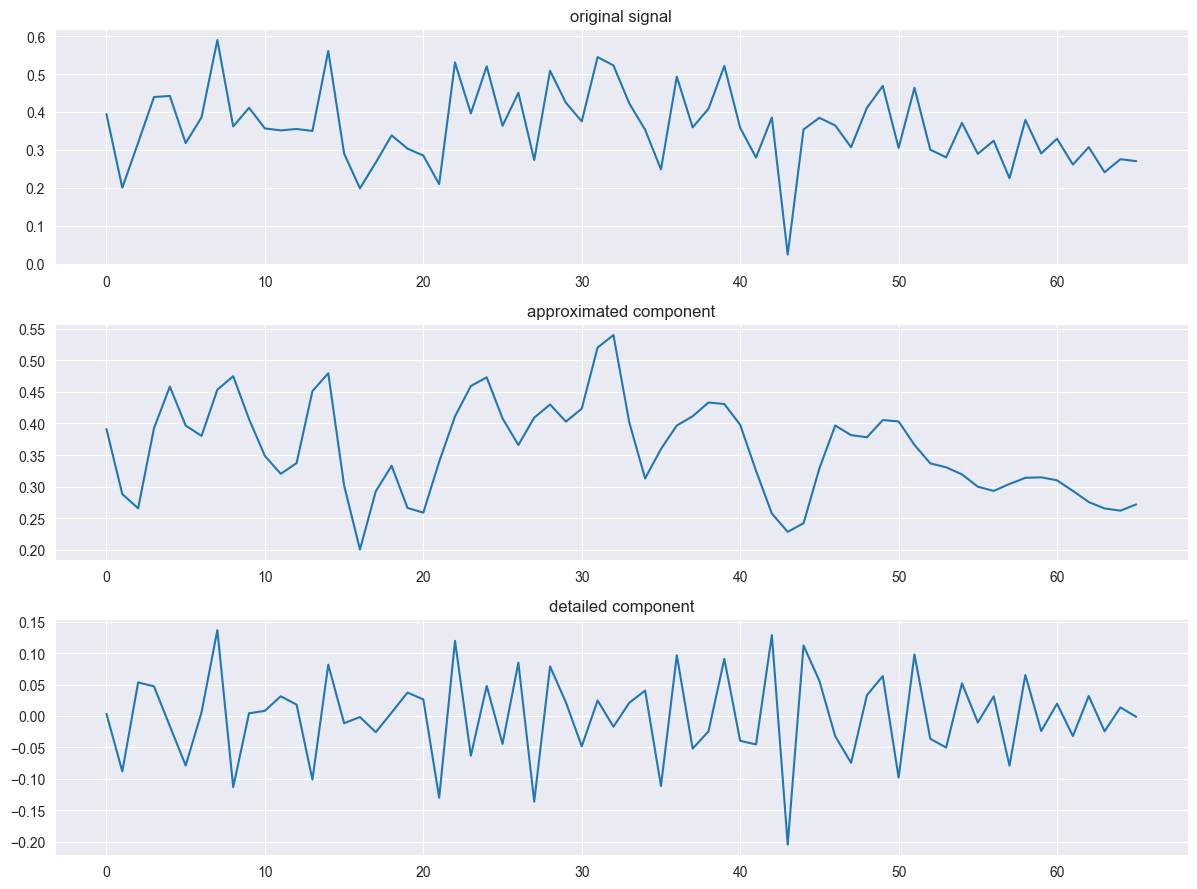

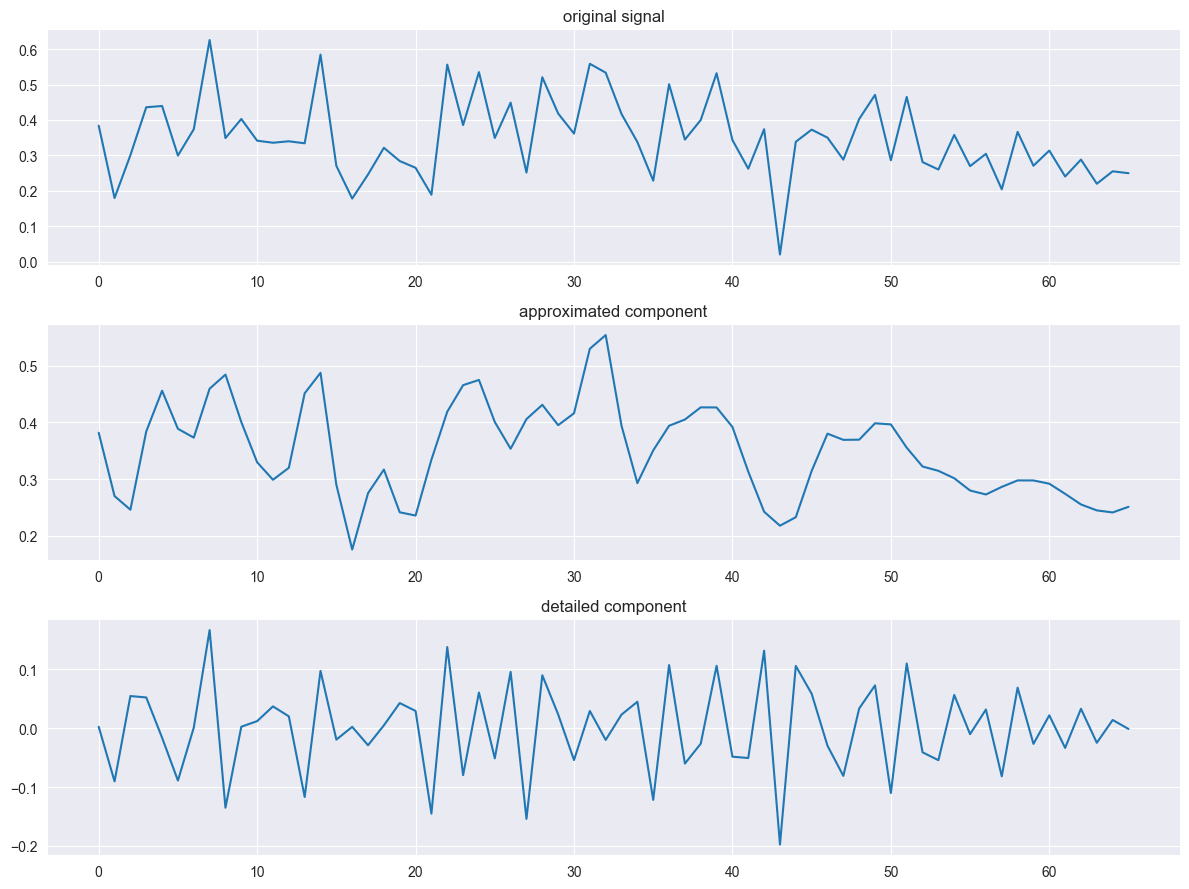

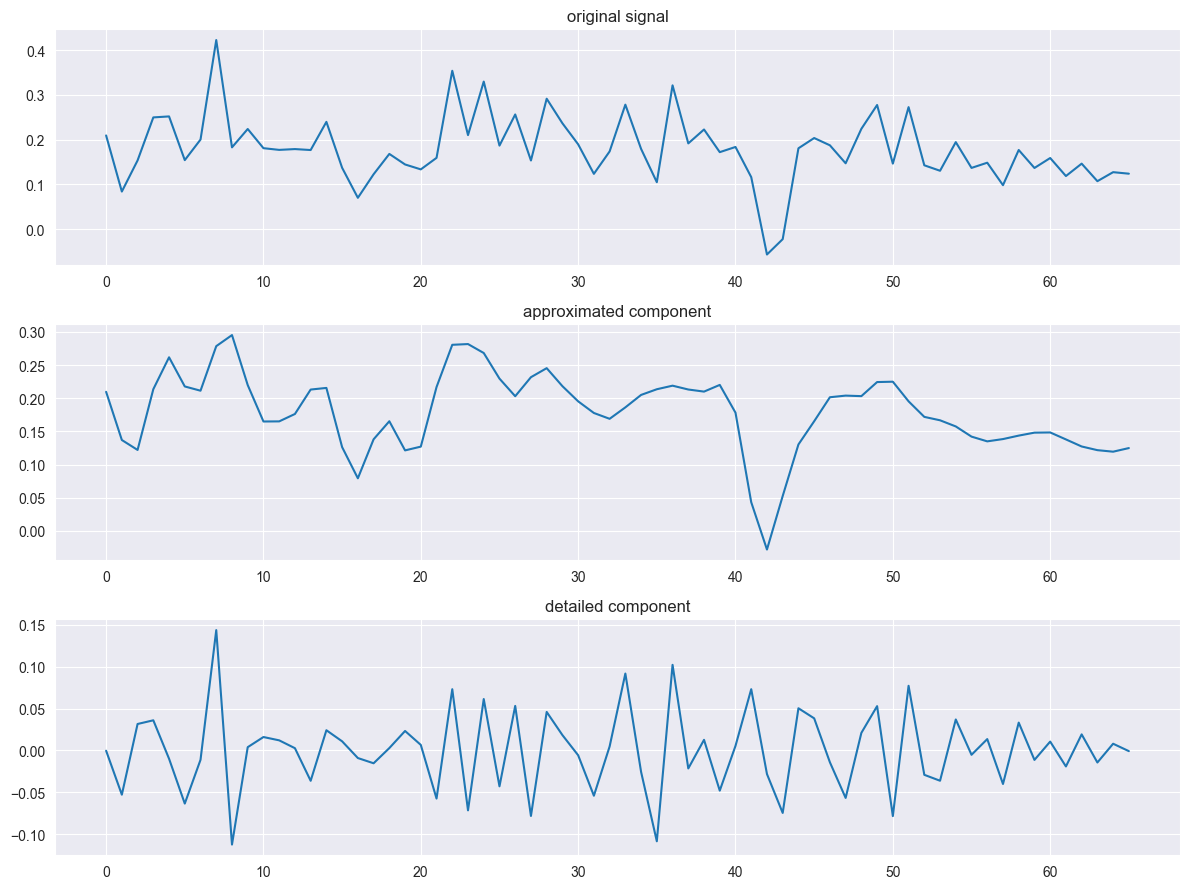

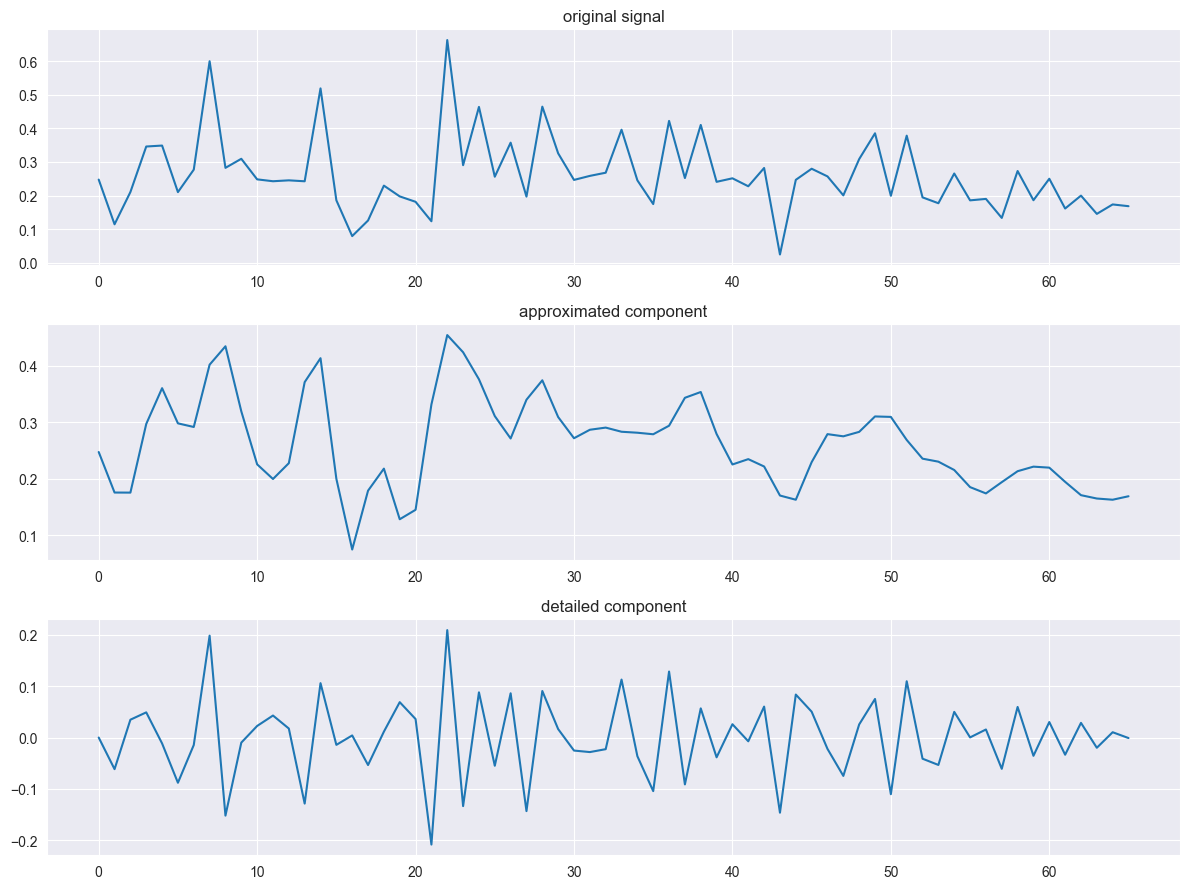

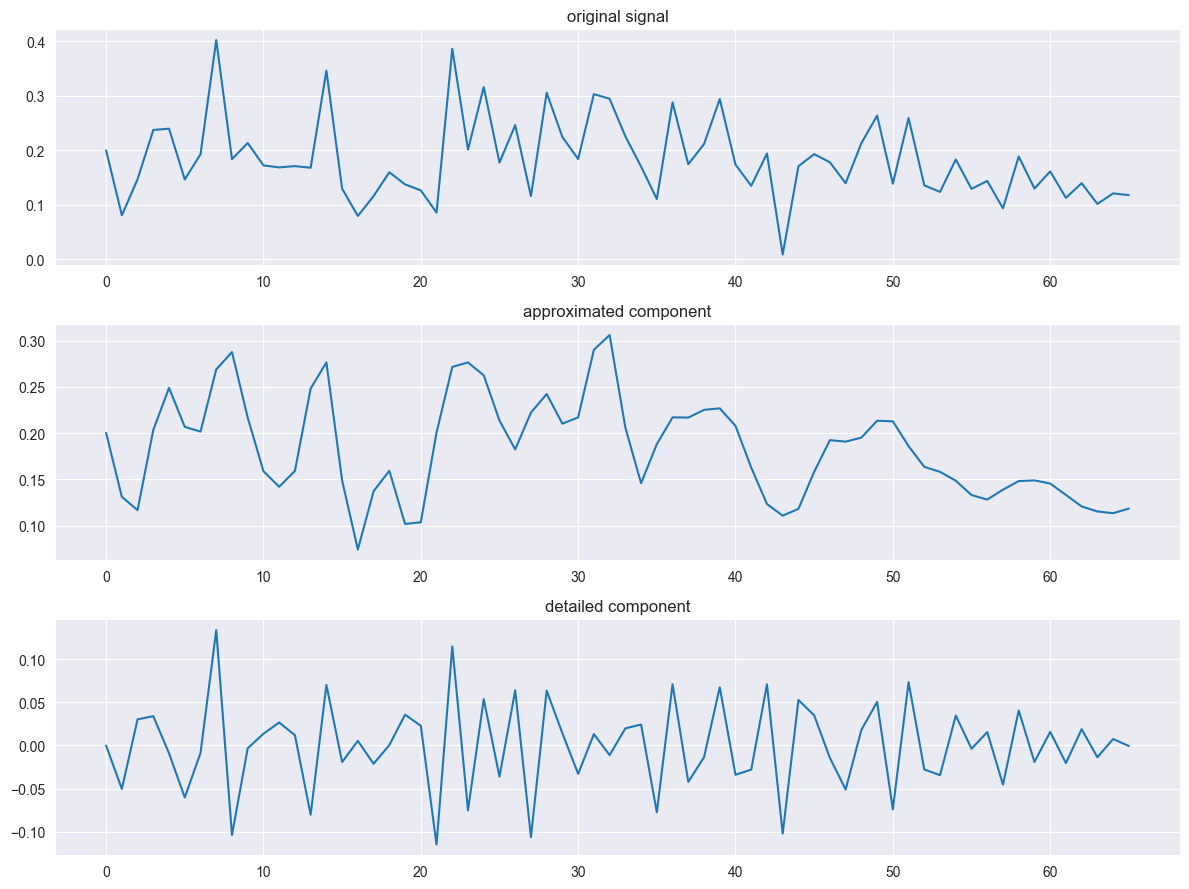

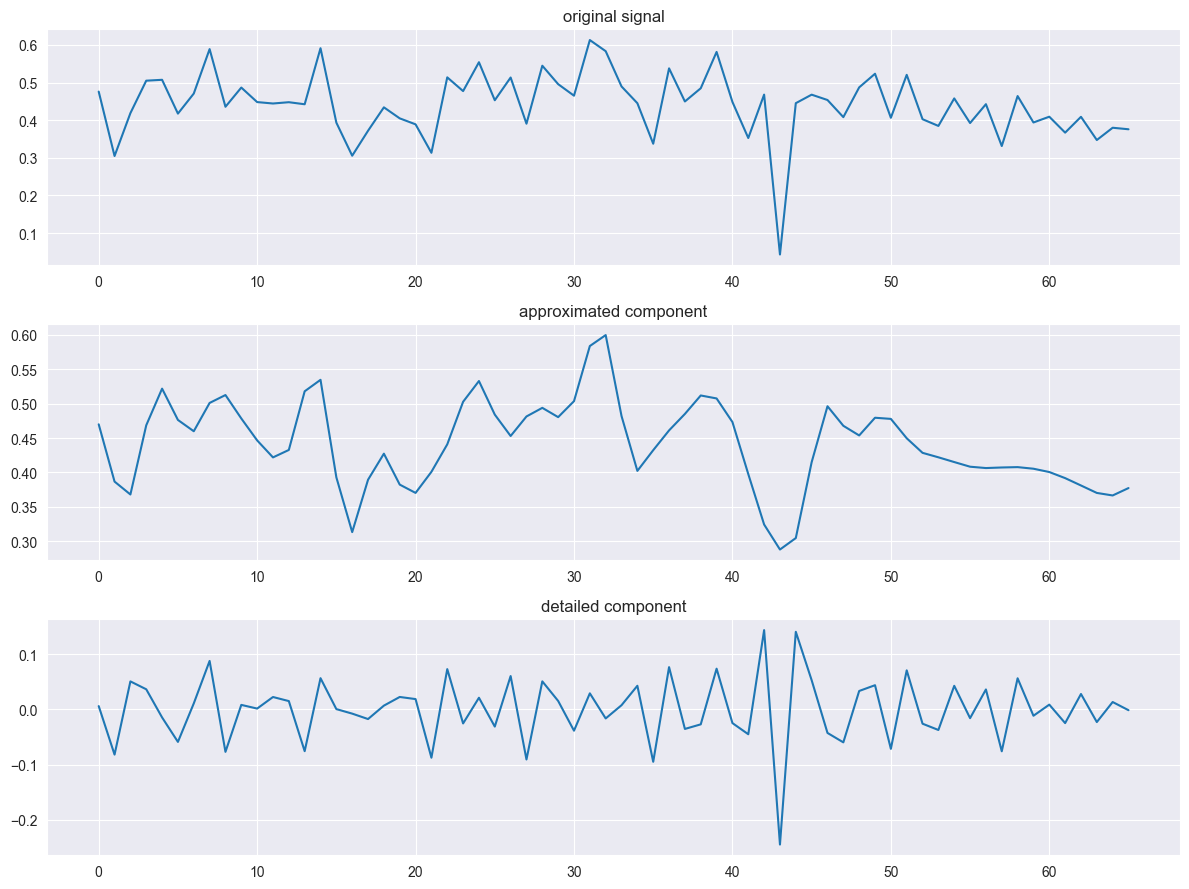

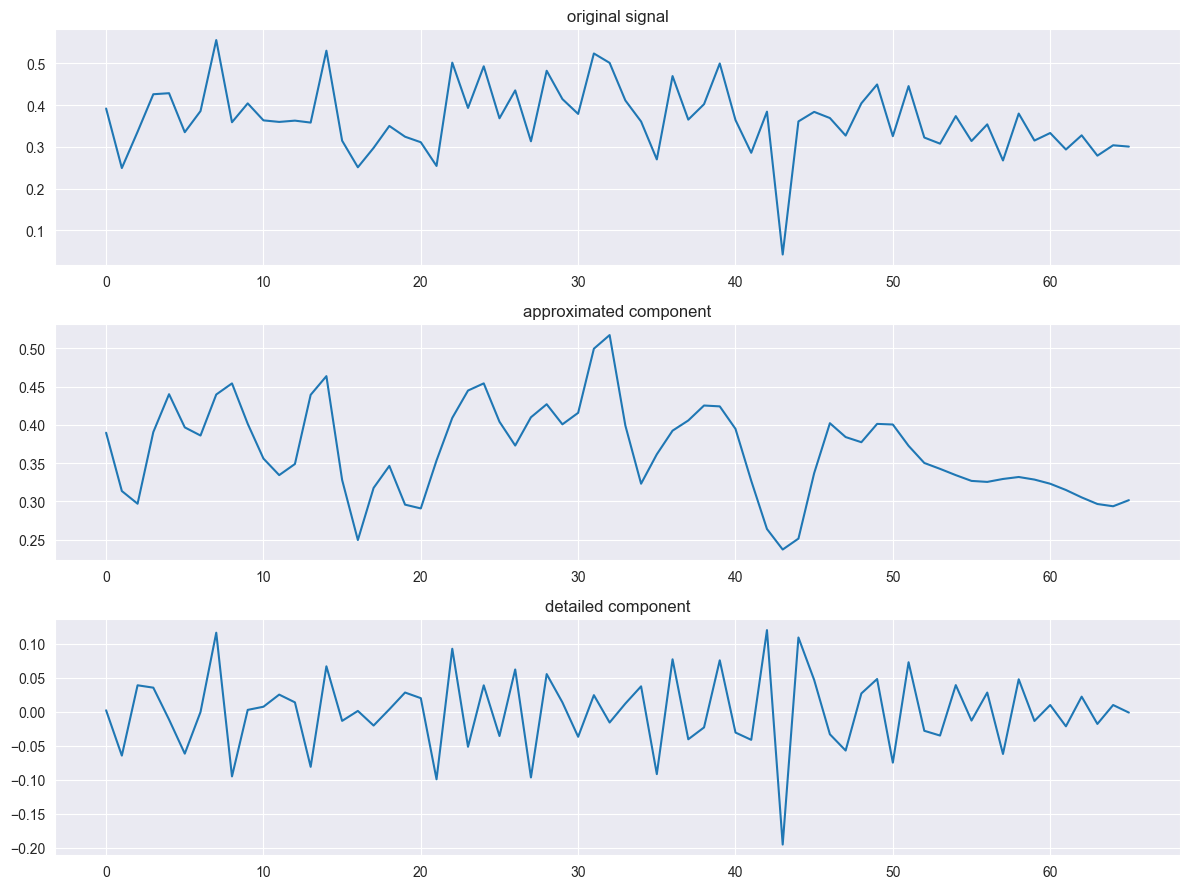

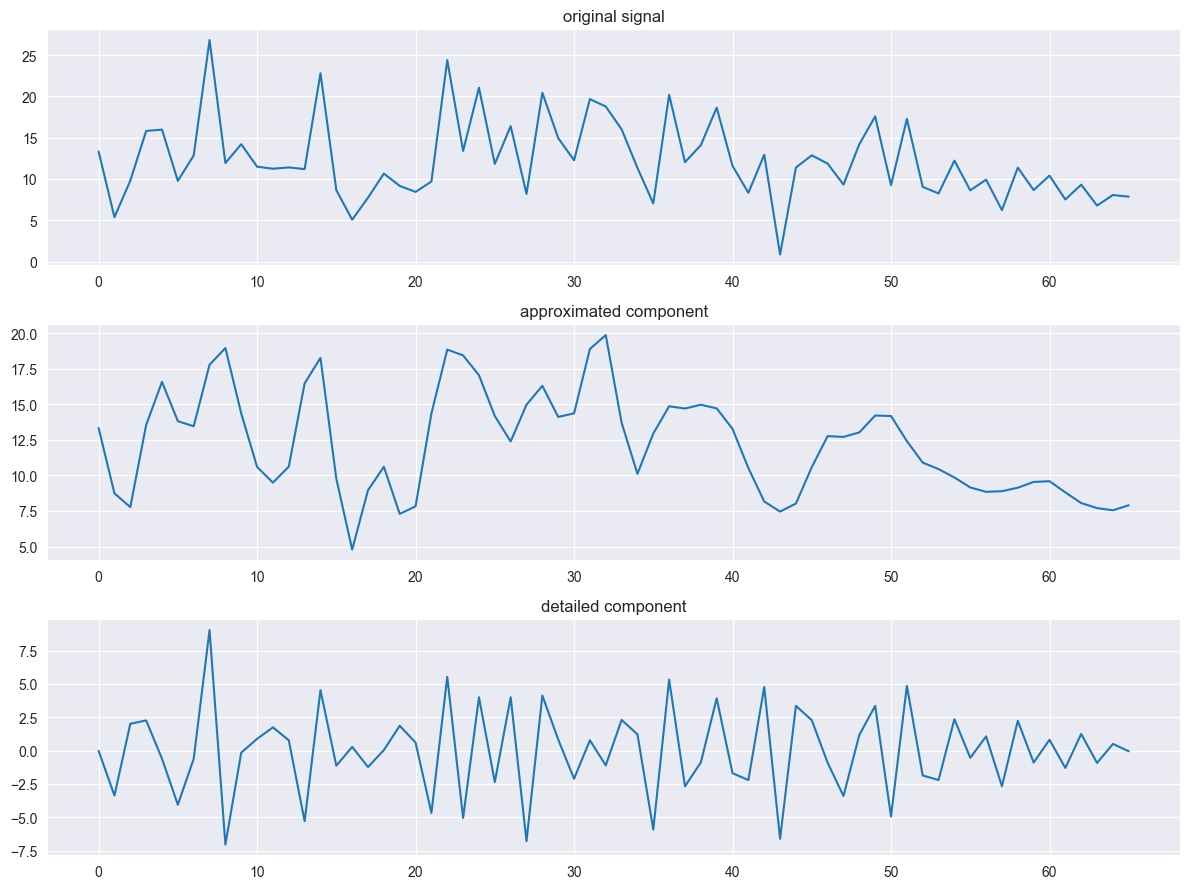

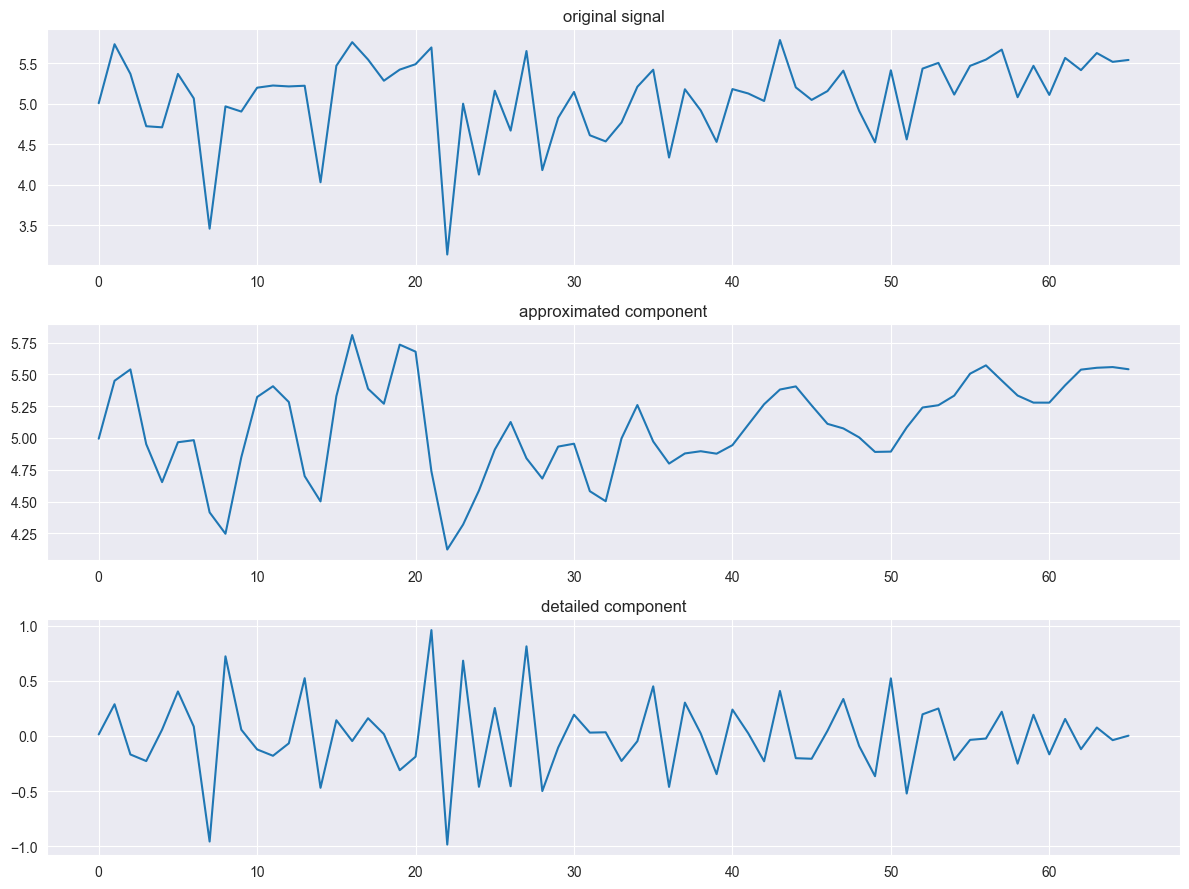

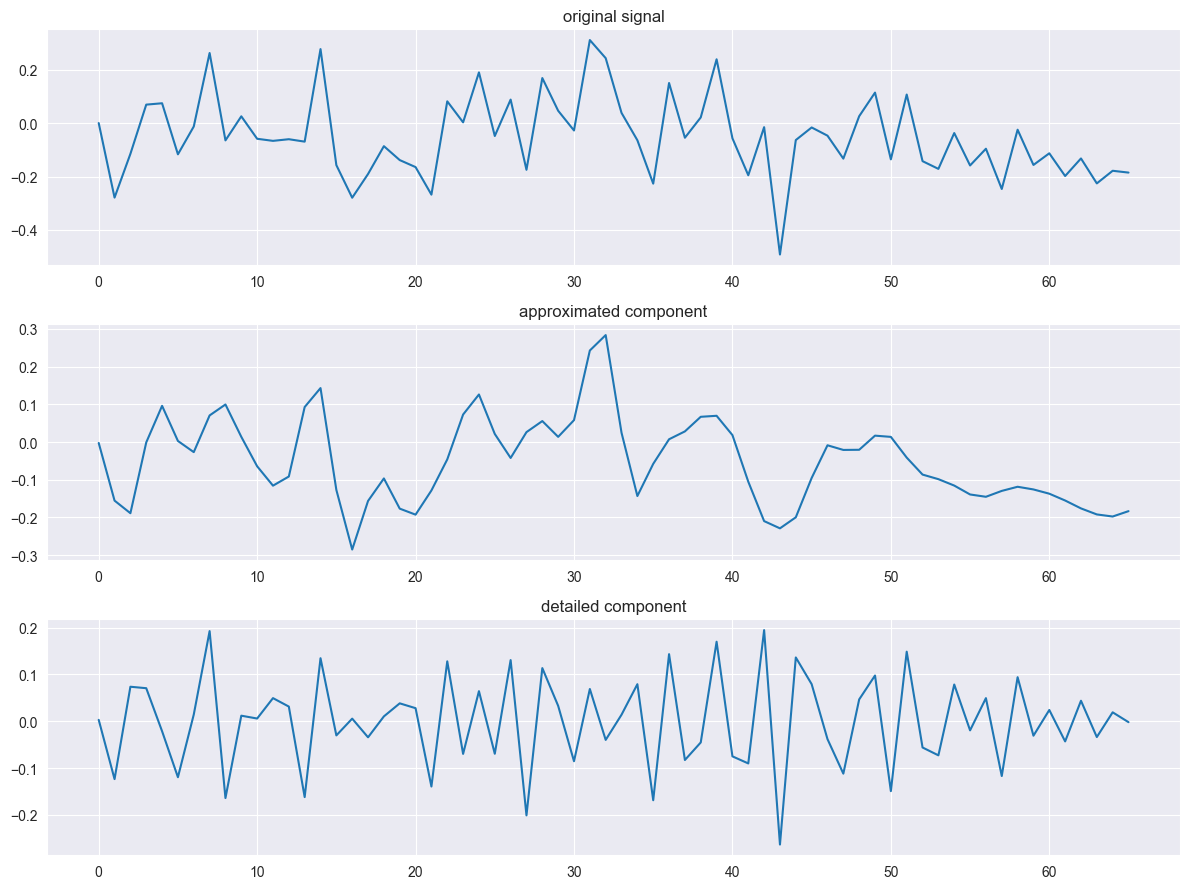

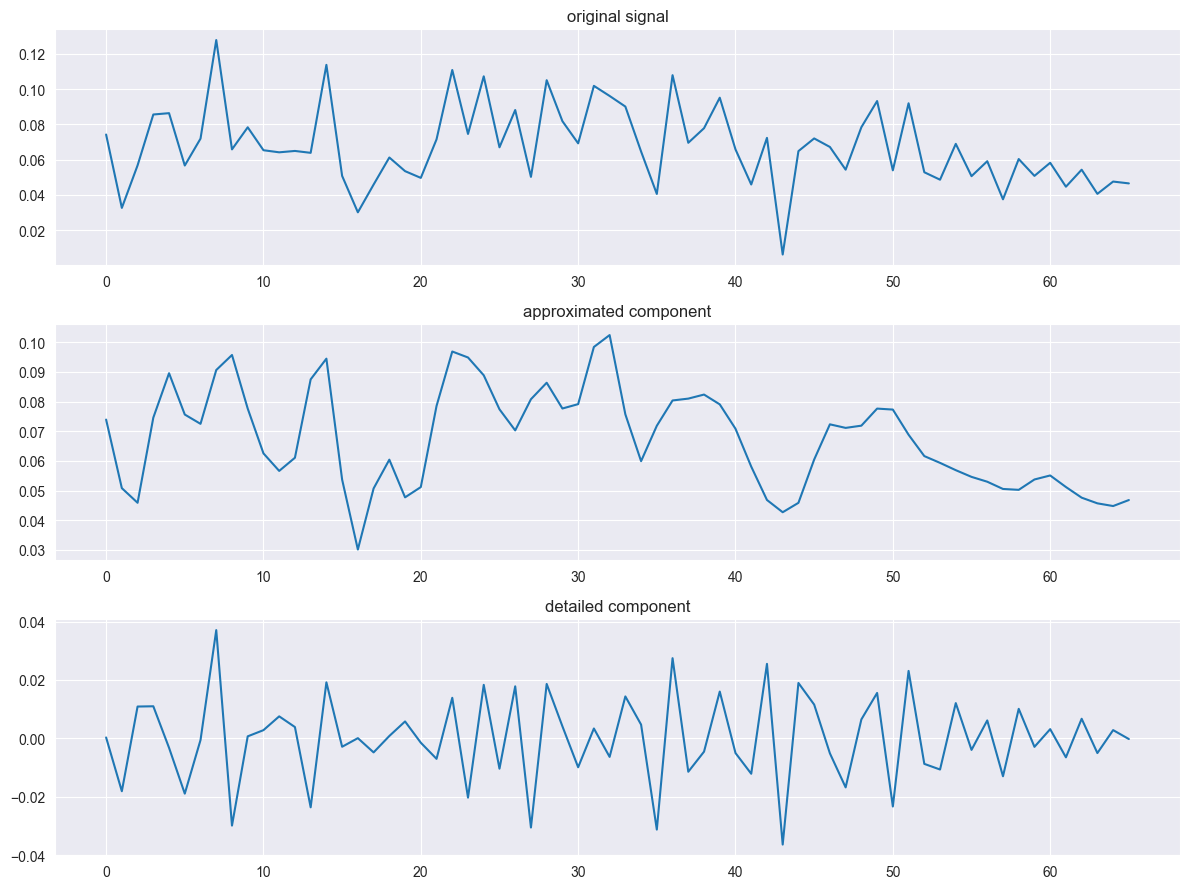

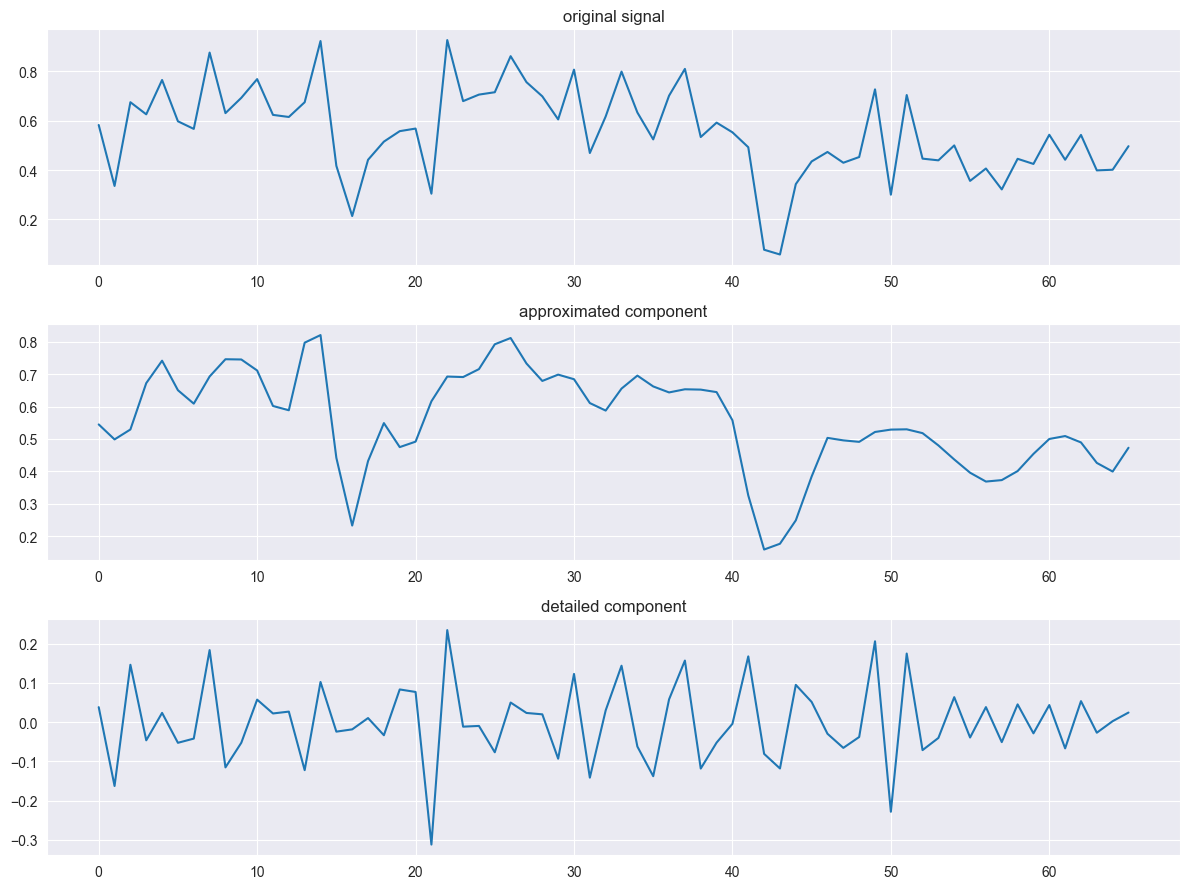

In [66]:
all_data = []
wavename = 'db5'
for i in range(len(transposed_array)):
    cA, cD = pywt.dwt(transposed_array[i], wavename)
    ya = pywt.idwt(cA, None, wavename, 'smooth')  # approximated component
    yd = pywt.idwt(None, cD, wavename, 'smooth')  # detailed component
    x = range(len(transposed_array[i]))
    plt.figure(figsize=(12, 9))
    plt.subplot(311)
    plt.plot(x, transposed_array[i])
    plt.title('original signal')
    plt.subplot(312)
    plt.plot(x, ya)
    plt.title('approximated component')
    plt.subplot(313)
    plt.plot(x, yd)
    plt.title('detailed component')
    plt.tight_layout()
    plt.show()
    # 假设你已经定义了 wavename、data_array、cA 和 cD 变量

    # 将每个数组组合为一个 DataFrame
    df = pd.DataFrame({
        'original_signal': transposed_array[i],
        'approximated_component': ya,
        'detailed_component': yd
    })
     # 将 DataFrame 添加到 all_data 列表
    all_data.append(df)
# 将所有数据合并为一个 DataFrame
merged_df = pd.concat(all_data, axis=1)
# 将 DataFrame 保存到 Excel 文件中
# merged_df.to_excel('output.xlsx', index=False)

In [68]:
# cA, cD = pywt.dwt(data_array, wavename)
# ya = pywt.idwt(cA, None, wavename, 'smooth')  # approximated component
# yd = pywt.idwt(None, cD, wavename, 'smooth')  # detailed component
# x = range(len(data_array))
# plt.figure(figsize=(12, 9))
# plt.subplot(311)
# plt.plot(x, data_array)
# plt.title('original signal')
# plt.subplot(312)
# plt.plot(x, ya)
# plt.title('approximated component')
# plt.subplot(313)
# plt.plot(x, yd)
# plt.title('detailed component')
# plt.tight_layout()
# plt.show()

In [34]:
# from openpyxl.utils.dataframe import dataframe_to_rows
# import pandas as pd
# import pywt
# import openpyxl
#
# # 假设你已经定义了 wavename、data_array、cA 和 cD 变量
#
# # 将近似分量和细节分量保存到DataFrame中
# df = pd.DataFrame({'Approximation': pywt.idwt(cA, None, wavename, 'smooth'),
#                    'Detail': pywt.idwt(None, cD, wavename, 'smooth')})
#
# # 将原始数据添加到DataFrame中
# df['Original'] = data_array
#
# # 创建一个新的Excel工作簿
# wb = openpyxl.Workbook()
#
# # 将DataFrame写入Excel工作表中
# ws = wb.active
# for r in dataframe_to_rows(df, index=False, header=True):
#     ws.append(r)
#
# # 将Excel文件保存到磁盘上
# wb.save('wavelet_data.xlsx')


In [67]:
# # 图像单边谱
# plt.figure(figsize=(12, 9))
# plt.subplot(311)
# data_f = abs(np.fft.fft(cA))/N
# data_f1 = data_f[range(int(N/2))]
# plt.plot(frq1, data_f1, 'red')
#
# plt.subplot(312)
# data_ff = abs(np.fft.fft(cD))/N
# data_f2 = data_ff[range(int(N/2))]
# plt.plot(frq1, data_f2, 'k')
#
#
# plt.xlabel('pinlv(hz)')
# plt.ylabel('amplitude')
#
# plt.show()